In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import xarray as xr
import numpy as np
from matplotlib.colors import SymLogNorm
from matplotlib.ticker import ScalarFormatter

In [5]:
# File paths
basedir = '/xdisk/sylvia/temakgoale/DYAMOND/DYAMOND_IMERG_biases/'
models = ['FV3', 'GEOS5', 'ICON', 'HadGEM3', 'NICAM', 'SAM']
#
# Load precipitation and CWP datasets
data_pr = {m: xr.open_dataset(f'{basedir}{m}_bias.nc') for m in models}
data_cwp = {m: xr.open_dataset(f'{basedir}{m}_CWP_bias.nc') for m in models}
#
# Extract variables
vals_pr = {m: data_pr[m]['pr'][0] for m in models}
vals_cwp = {m: data_cwp[m]['cwp'][0] for m in models}
lons_pr = {m: data_pr[m].lon for m in models}
lats_pr = {m: data_pr[m].lat for m in models}
lons_cwp = {m: data_cwp[m].longitude for m in models}
lats_cwp = {m: data_cwp[m].latitude for m in models}
#
# Normalizations
norm_pr = SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-2.19, vmax=4, base=10)
norm_cwp = SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-0.5, vmax=1, base=10)
#
# Formatter
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    return fr'${a} \times 10^{{{int(b)}}}$'

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))


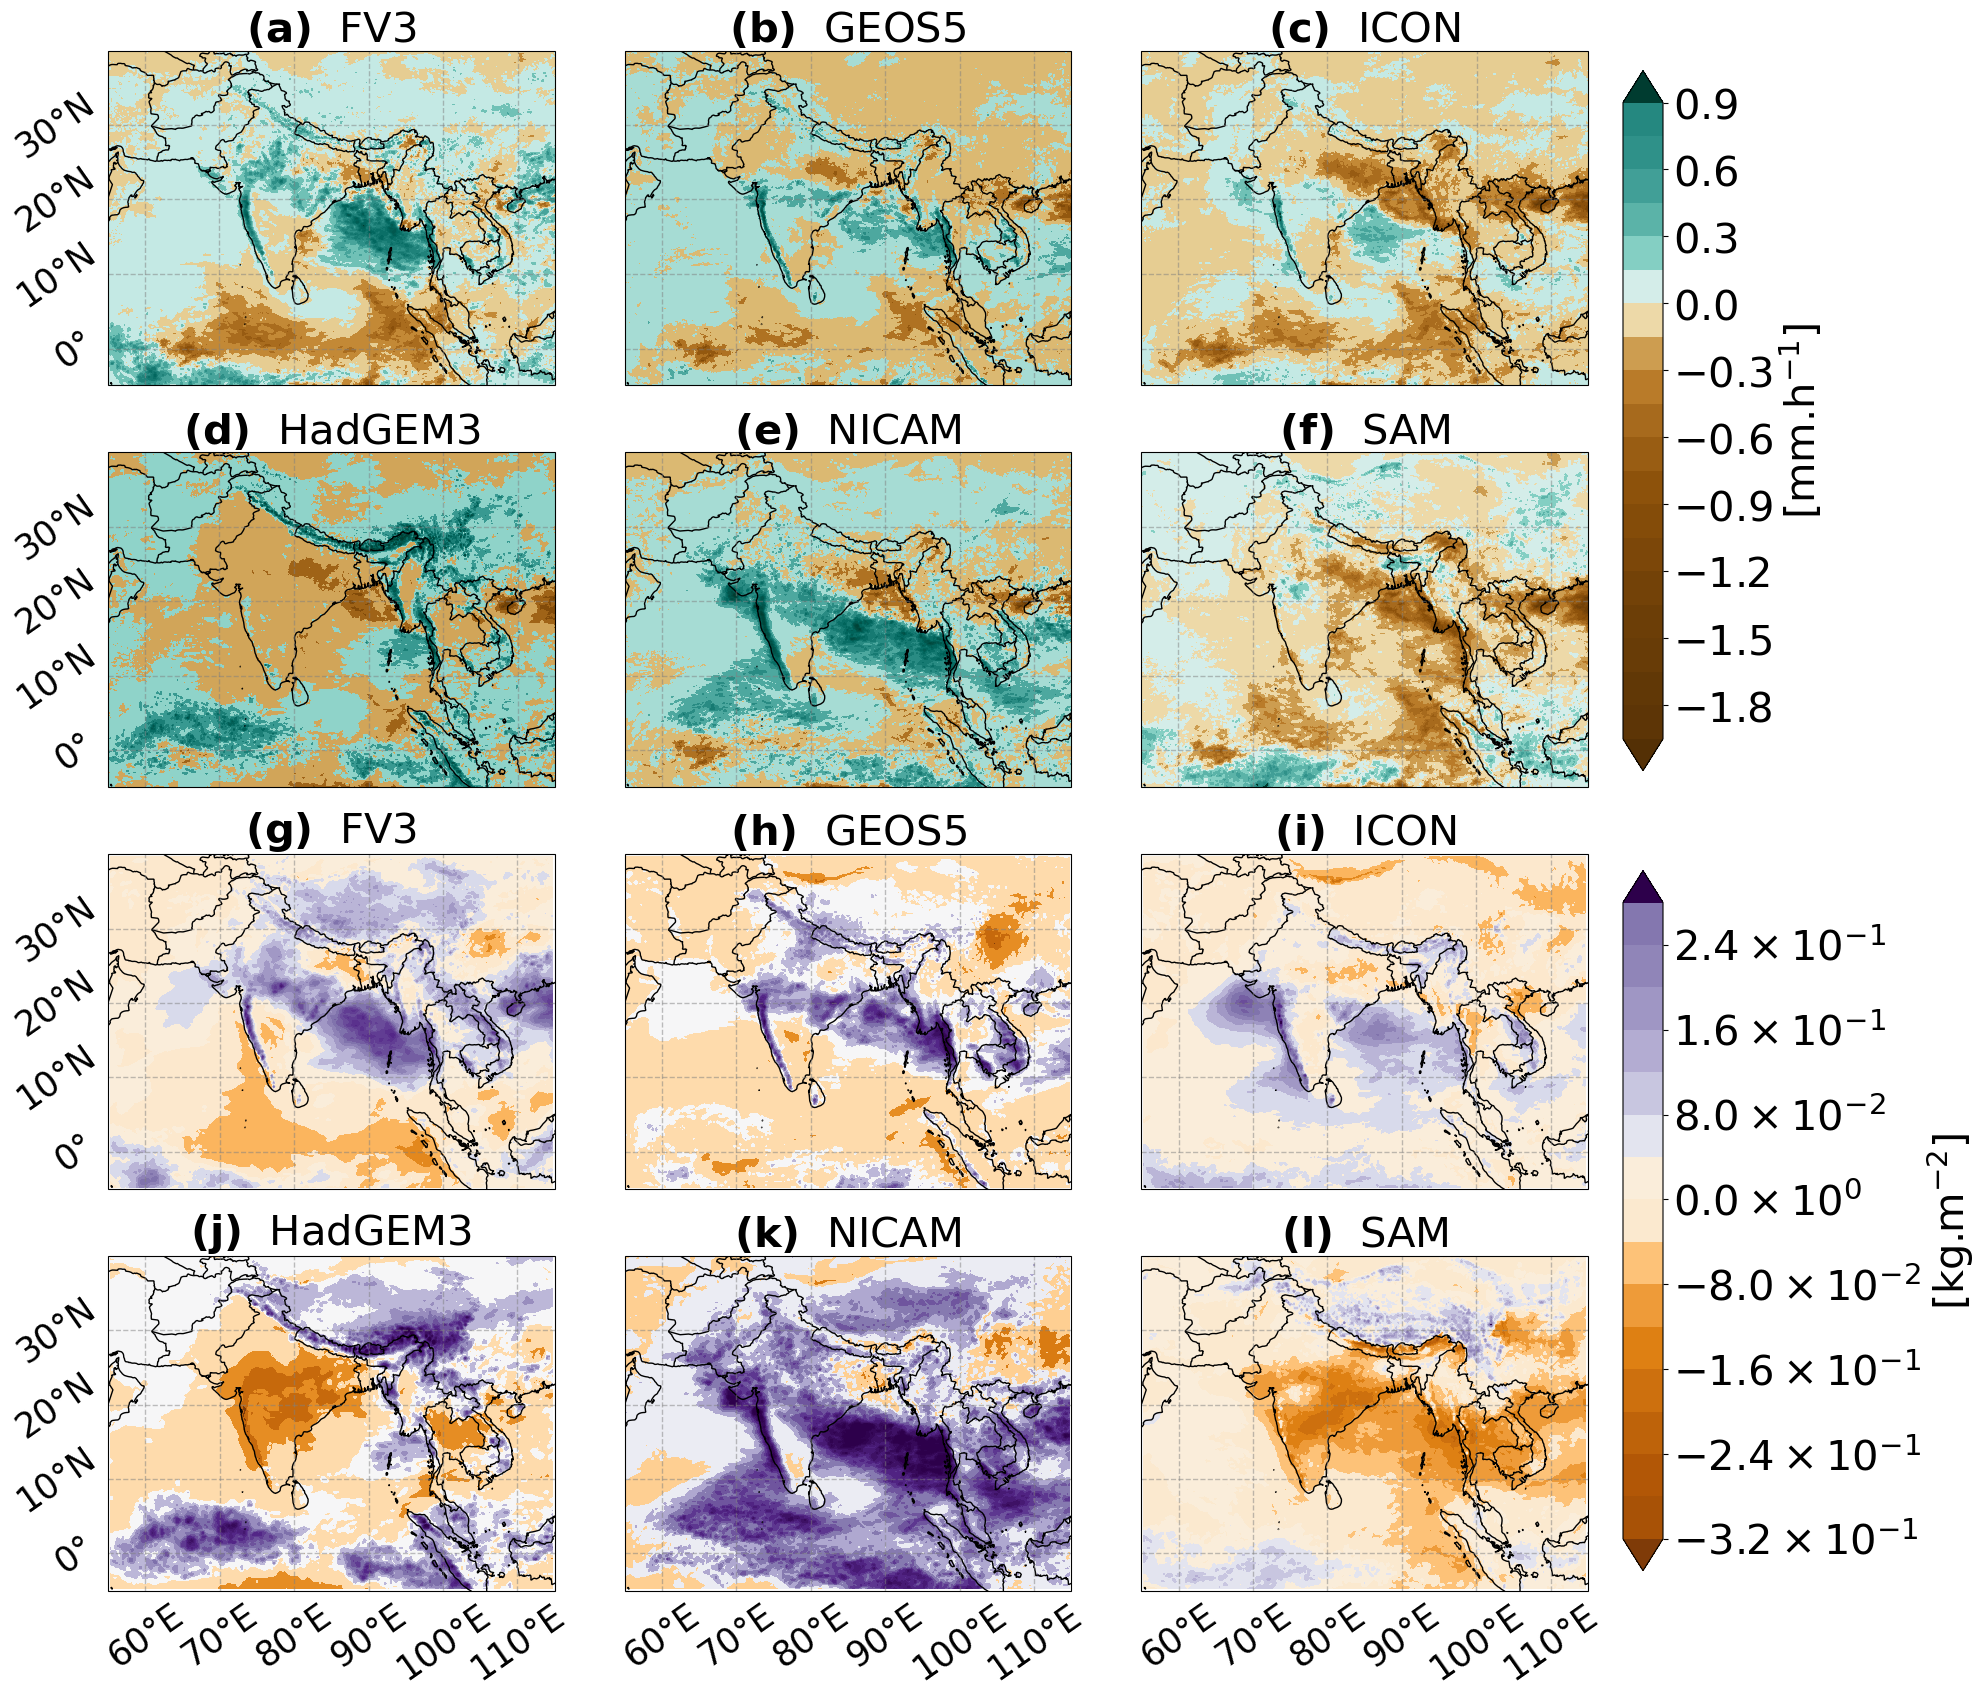

In [6]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

for i, m in enumerate(models):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    im = ax.contourf(lons_pr[m], lats_pr[m], vals_pr[m], levels=20, norm=norm_pr, cmap='BrBG', extend='both')
    ax.set_title(fr'$\bf{{({chr(97+i)})}}$  {m}', size=30)
    ax.coastlines()
    ax.add_feature(cf.BORDERS)
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False
    gl.bottom_labels = row == 3
    gl.left_labels = col == 0
    gl.xlabel_style = gl.ylabel_style = {'size': 25, 'rotation': 35}

# Colorbar for pr
cbar_ax1 = fig.add_axes([0.9, 0.52, 0.02, 0.35])
cbar1 = fig.colorbar(im, cax=cbar_ax1, extend='both', orientation='vertical', format=fmt)
cbar1.set_label(r'[mm.h$^{-1}$]', size=30)
cbar1.ax.tick_params(labelsize=30)
cbar1.ax.yaxis.set_major_formatter(formatter)

# Plot CWP
for i, m in enumerate(models):
    row, col = divmod(i, 3)
    ax = axes[row+2, col]
    im = ax.contourf(lons_cwp[m], lats_cwp[m], vals_cwp[m], levels=20, norm=norm_cwp, cmap='PuOr', extend='both')
    ax.set_title(fr'$\bf{{({chr(103+i)})}}$  {m}', size=30)
    ax.coastlines()
    ax.add_feature(cf.BORDERS)
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False
    gl.bottom_labels = row == 1
    gl.left_labels = col == 0
    gl.xlabel_style = gl.ylabel_style = {'size': 25, 'rotation': 35}

# Colorbar for CWP
cbar_ax2 = fig.add_axes([0.9, 0.12, 0.02, 0.35])
cbar2 = fig.colorbar(im, cax=cbar_ax2, extend='both', orientation='vertical', format=fmt)
cbar2.set_label(r'[kg.m$^{-2}$]', size=30)
cbar2.ax.tick_params(labelsize=30)

fig.subplots_adjust(wspace=0)
#fig.savefig('/home/u32/temakgoale/Precipitation_Efficiency_Paper/Figure_2_Evaluation_Models_bias.pdf', format="pdf", dpi=100, bbox_inches="tight")
#plt.savefig('/home/u32/temakgoale/Precipitation_Efficiency_Paper/Figure_2_Evaluation_Models_bias.png', dpi=100, bbox_inches='tight')
